In [ ]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=934be557f11b3a1589a64935411881ac1759a42fa1905506ca81b81a9452efc3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt

#from langdetect import detect, DetectorFactory
#from langdetect.lang_detect_exception import LangDetectException

In [ ]:
def show(df):
  df['Rating'].plot(kind='hist', bins=20, title='Rating')
  plt.gca().spines[['top', 'right',]].set_visible(False)
  df.info()

# Augmentation PL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27966 entries, 0 to 27965
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  27966 non-null  int64  
 1   Book Title  27966 non-null  object 
 2   Review      27966 non-null  object 
 3   Rating      27966 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 874.1+ KB


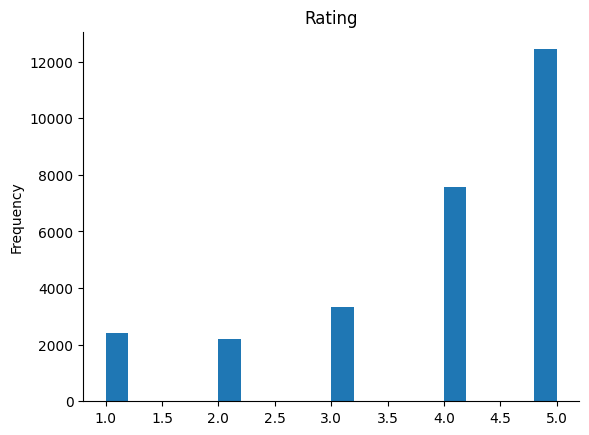

In [ ]:
dg = pd.read_csv("/content/ang_full.csv")
show(dg)

## Back Translate

In [ ]:
def back_translate_polish(text, src_lang='en', tgt_lang='pl'):
    try:
        translated = GoogleTranslator(source=src_lang, target=tgt_lang).translate(text)
        back_translated = GoogleTranslator(source=tgt_lang, target=src_lang).translate(translated)
        #print(f"Translation worked for: {text}")
        return back_translated
    except Exception as e:
        print(f"Translation failed for: {text}, error: {e}")
        return text

def aug(df, target_rating):
  polish_reviews = df[df['Rating'] == target_rating]['Review']
  augmented_polish_reviews = polish_reviews.apply(back_translate_polish)

  augmented_df = pd.DataFrame({
      'Review': augmented_polish_reviews,
      'Rating': [target_rating] * len(augmented_polish_reviews)
  })

  df = pd.concat([df, augmented_df]).reset_index(drop=True)
  return df

In [ ]:
dg = aug(dg, 2.0)

Translation failed for: I read this when it was first published, ordering it before I knew it was YA, and years before any films (which I've not seen). If I were a teenager or recommending this to a teen, I might give it 3*; as an adult, I give it 2*.PLOTIt's a potentially exciting but gruesome story, but most of the characters were rather flat, and much of the plot was predictable, partly because it's not hugely original. See Shirley Jackson'sThe Lottery, which I reviewedHERE, and the JapaneseBattle Royale. Furthermore, there were too many flaws in the plot. I fail to understand its very high ratings.Post-apocalyptic America (Panem) is divided into a wealthy and technologically advanced Capitol and twelve subsidiary districts of oppressed people who exist in dire poverty, with inadequate food, housing, and health care and hardly any technology. To reinforce the power of the Capitol by instilling fear in the population, once a year, two children from each region are selected by lots to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32595 entries, 0 to 32594
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  27966 non-null  float64
 1   Book Title  27966 non-null  object 
 2   Review      32595 non-null  object 
 3   Rating      32595 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1018.7+ KB


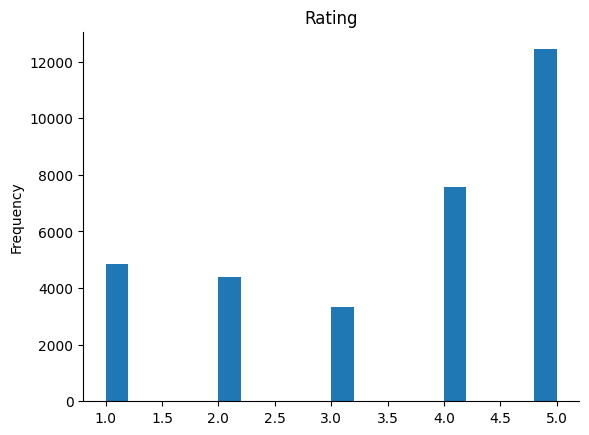

In [ ]:
show(dg)

In [ ]:
dg.to_csv("temp_eng.csv")

#Cleaning - eng

In [ ]:
def load_dataset(data):
  result = pd.DataFrame()
  for d in data:
    df = pd.read_csv(d)
    if 'Review' in df.columns:
          df['Review'] = df['Review'].astype(str)

    def is_english(text):
                try:
                    return detect(text) == 'en'
                except LangDetectException:  # Handle cases where detection fails
                    return False

    df = df[df['Review'].apply(is_english)]
    df = df.dropna(subset=['Review', 'Rating'])
    result = pd.concat([result, df], ignore_index=True)

  return result

In [ ]:
links = []
for i in range(13):
  links.append(f"/content/scraped_reviews_batch_{i}.csv")

for i in range(19):
  links.append(f"/content/scraped_reviews_batch_{i}_bb1.csv")

df = load_dataset(links)

In [ ]:
print(df['Review'].isnull().sum(), df['Rating'].isnull().sum())

0 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27966 entries, 0 to 27965
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Book Title  27966 non-null  object 
 1   Review      27966 non-null  object 
 2   Rating      27966 non-null  float64
dtypes: float64(1), object(2)
memory usage: 655.6+ KB


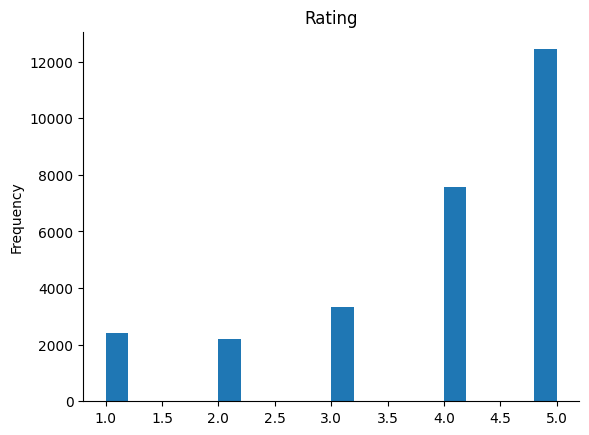

In [ ]:
show(df)

In [ ]:
df.to_csv("ang_full.csv")